## **SAIRAJ NITIN GONDKAR**

# **GRIP : The Sparks Foundation**

# **Task 6 : Prediction using Decision Tree Algorithm.**


### Problem Statement : Create the Decision Tree Classifier and visualize it Graphically. The purpose is that if we feed any new data to this classifier, it would be able to predict the right class accordingly.

### **Dataset** : https://bit.ly/3kXTdox


**Importing the Libraries and Loading Iris Dataset**

In [ ]:
pip install pydot


In [ ]:
pip install ipython

In [ ]:
# Importing the required libraries

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import pydot
from IPython.display import Image

**Loading the Dataset**

In [ ]:
# Loading Dataset
iris = load_iris()
X = iris.data[:,:]
y = iris.target

In [ ]:
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [ ]:
print(len(X[0]))

4


In [ ]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
print(len(X),len(y))

150 150


In [ ]:
print("Total Number of Examples in the Dataset are: ",len(X))

Total Number of Examples in the Dataset are:  150


**EXPLORATORY DATA ANALYSIS**

In [ ]:
# Input Data

data = pd.DataFrame(iris['data'],columns=['Petal Length','Petal Width','Sepal Length','Sepal Width'])
data['Species'] = iris['target']
data['Species'] = data['Species'].apply(lambda x: iris['target_names'][x])

In [ ]:
data.head()

,Petal Length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
data.tail()

,Petal Length,Petal Width,Sepal Length,Sepal Width,Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [ ]:
data.shape

(150, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Petal Length  150 non-null    float64
 1   Petal Width   150 non-null    float64
 2   Sepal Length  150 non-null    float64
 3   Sepal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.describe()

,Petal Length,Petal Width,Sepal Length,Sepal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.isnull().sum()

Petal Length    0
Petal Width     0
Sepal Length    0
Sepal Width     0
Species         0
dtype: int64

**Data Visualization Comparing Various Features**

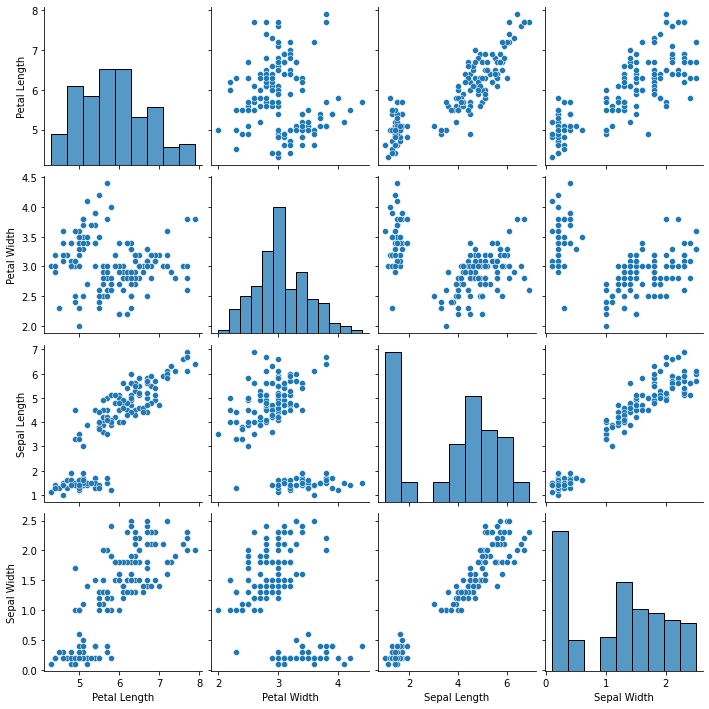

In [ ]:
# Input Data Visualization
sns.pairplot(data)

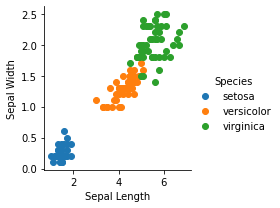

In [ ]:
# Scatter plot of data based on Sepal Length and Width Features
sns.FacetGrid(data,hue='Species').map(plt.scatter,'Sepal Length','Sepal Width').add_legend()
plt.show()

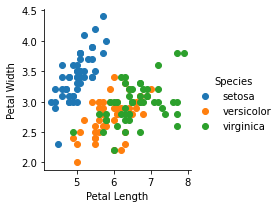

In [ ]:
# Scatter plot of data based on Petal Length and Width Features
sns.FacetGrid(data,hue='Species').map(plt.scatter,'Petal Length','Petal Width').add_legend()
plt.show()

### Decision Tree Model Training 

In [ ]:
# Model Training 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train,y_train)
print("Model Training Complete!!")
y_pred = tree_classifier.predict(X_test)

Model Training Complete!!


### Comparing the Actual and Predicted Flower Classification

In [ ]:
df = pd.DataFrame({'Actual': y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1
5,0,0
6,1,1
7,2,2
8,1,1
9,1,1


In [ ]:
print("Accuracy of the Model: ",sm.accuracy_score(y_test,y_pred)*100,"%")

Accuracy of the Model:  98.0 %


### Visualizing the Trained Model

In [ ]:
pip install pydotplus

In [ ]:
pip install graphviz

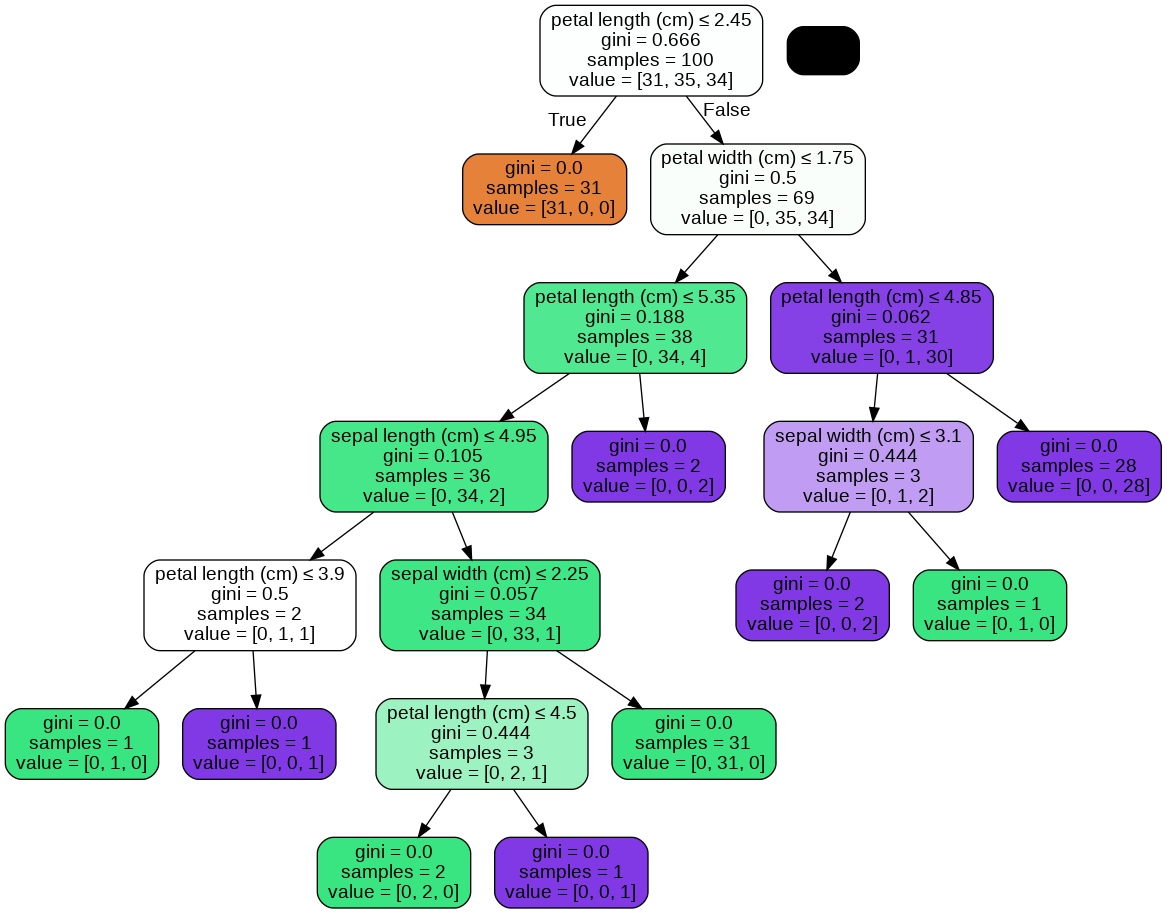

In [ ]:
# Visualizing the trained Decision Tree Classifier taking all 4 features in consideration

from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(tree_classifier, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#** OR **

# **Import the Decision Tree Classifier and Fit the Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

print("The Decision Tree Classifier Created Successfully !!")

The Decision Tree Classifier Created Successfully !!


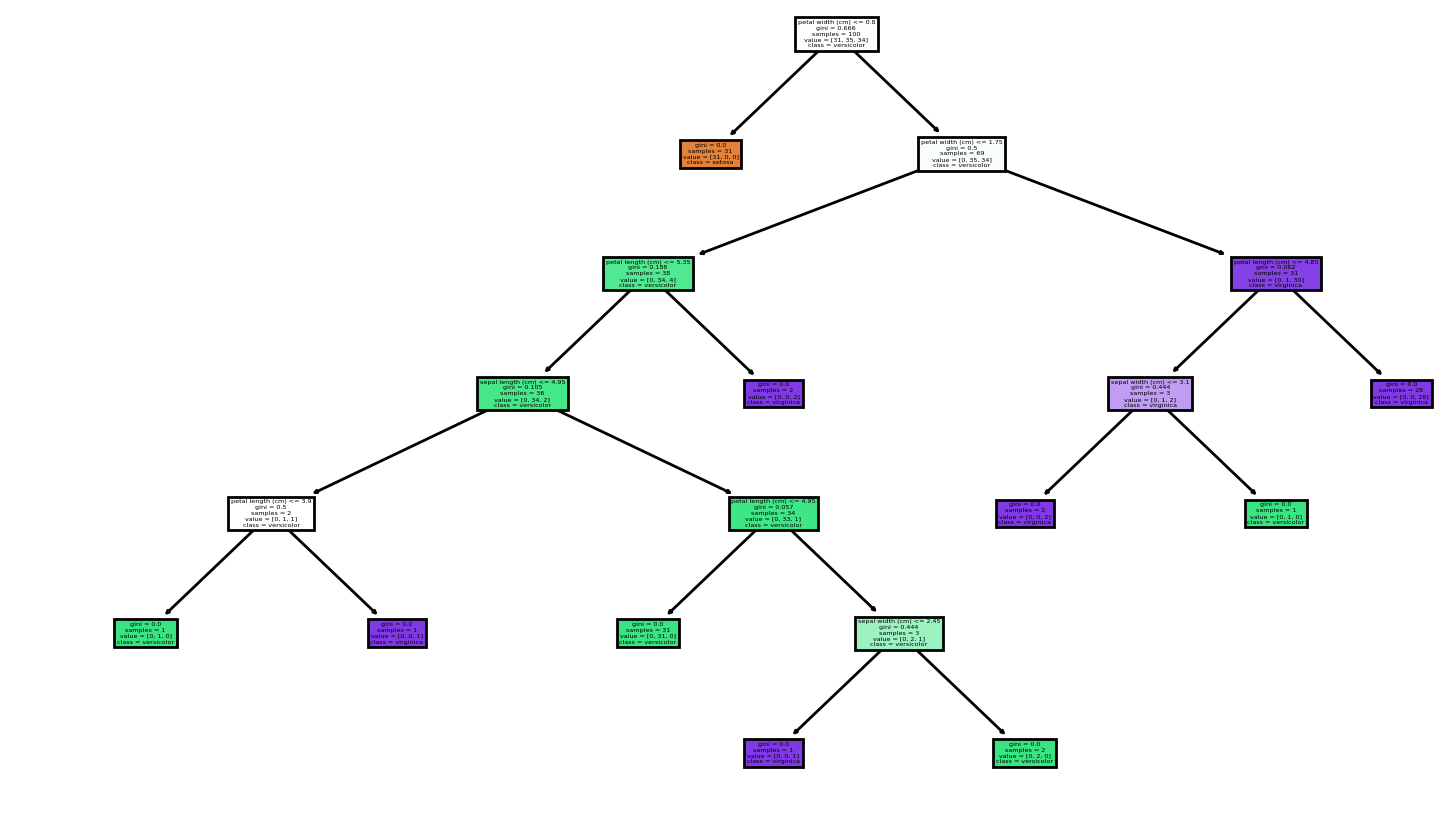

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree 

a = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
b = ['setosa','versicolor','virginica']

fig, axes = plt.subplots(nrows =1, ncols=1, figsize=(3.5,2), dpi=200)

tree.plot_tree(dtree, feature_names=a, class_names=b, filled= True);

# **Predicting the Class Output for some random values of petal and sepal length and width.**

In [ ]:
print("Class Names = ",iris.target_names)

# Estimating Class Probabilities
print()
print("Estimating Class Probabilities for Flower whose petals length and width are 4.7cm and 3.2cm and sepal length and width are 1.3cm and 0.2cm. ")
print()
print("Output = ",tree_classifier.predict([[4.7,3.2,1.3,0.2]]))
print()
print("Our Model Predicts the class as 0, that is, IRIS Setosa")

Class Names =  ['setosa' 'versicolor' 'virginica']

Estimating Class Probabilities for Flower whose petals length and width are 4.7cm and 3.2cm and sepal length and width are 1.3cm and 0.2cm. 

Output =  [0]

Our Model Predicts the class as 0, that is, IRIS Setosa


# **Calculating the Model Accuracy**

In [ ]:
# Model Accuracy
print("Accuracy : ",sm.accuracy_score(y_test,y_pred)*100,"%")

Accuracy :  98.0 %


# **Conclusion**

### ***I was able to successfully carry-out Prediction using Decision Tree Algorithm and was able to evaluate the Model's Accuracy Score.***

### **Thank You!!**